# Damped-Local-Trend(DLT) Example

In [1]:
import pandas as pd
import numpy as np
from orbit.models.dlt import DLTMAP
from orbit.diagnostics.plot import plot_predicted_data
from orbit.diagnostics.plot import plot_predicted_components
from orbit.utils.dataset import load_iclaims

## Data

In [2]:
raw_df = load_iclaims()
raw_df.dtypes

week              datetime64[ns]
claims                     int64
trend.unemploy           float64
trend.filling            float64
trend.job                float64
dtype: object

In [3]:
df=raw_df.copy()
df[['claims', 'trend.unemploy', 'trend.filling', 'trend.job']] =\
df[['claims', 'trend.unemploy', 'trend.filling', 'trend.job']].apply(np.log)

## The DLT Model

Just like `orbit.lgt.LGT` it is a variation of traditional exponential smoothing models.  The difference between `DLT` and `LGT` are mainly:

- It introduces a damped factor on local trend
- It models global trend as a determinstic projection

There are four options in modeling the `global trend` with the `global_trend_option` arguemnt:

1. `linear`
2. `loglinear`
3. `logistic`
4. `flat`

The behavior of these three options will depend on the condition of `is_multiplicative` as well.  Below, we only show cases with condition when `is_multiplicative` as `True` since it is the default.

## Linear Trend

In multiplicative model, the linear trend as default will be transformed as exponential growh/decay.

In [4]:
dlt = DLTMAP(
    response_col='claims',
    date_col='week',
    seasonality=52,
    seed=2020,
)

In [5]:
dlt.fit(df)

In [6]:
from datetime import timedelta
num_periods = 52 * 4
freq = 7
date_col = dlt.date_col
last_dt = (df[date_col].dt.to_pydatetime())[-1]
dts = [last_dt + timedelta(days=x * freq) for x in range(1, num_periods + 1)]
future_df = pd.DataFrame(dts, columns=[date_col])

In [7]:
predicted_df = dlt.predict(df=future_df, decompose=True)

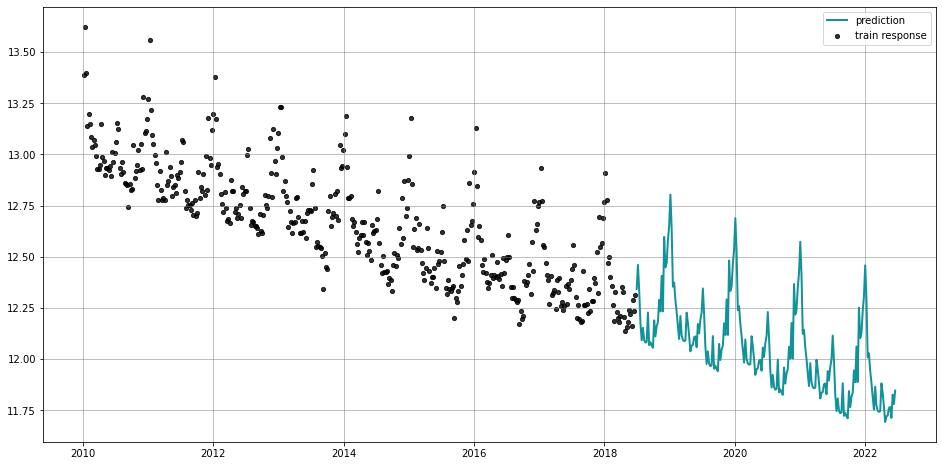

In [8]:
_ = plot_predicted_data(training_actual_df=df, predicted_df=predicted_df, 
                    date_col=dlt.date_col, actual_col=dlt.response_col)

## Log-Linear Trend

For users who want to maintain linear trend assumption in the multiplicative model, they can switch to `loglinear` global trend.  

In [9]:
dlt_log = DLTMAP(
    response_col='claims',
    date_col='week',
    seasonality=52,
    seed=2020,
    global_trend_option='loglinear',
)

In [10]:
dlt_log.fit(df=df)

In [11]:
predicted_df_dlt_log = dlt_log.predict(df=future_df, decompose=True)

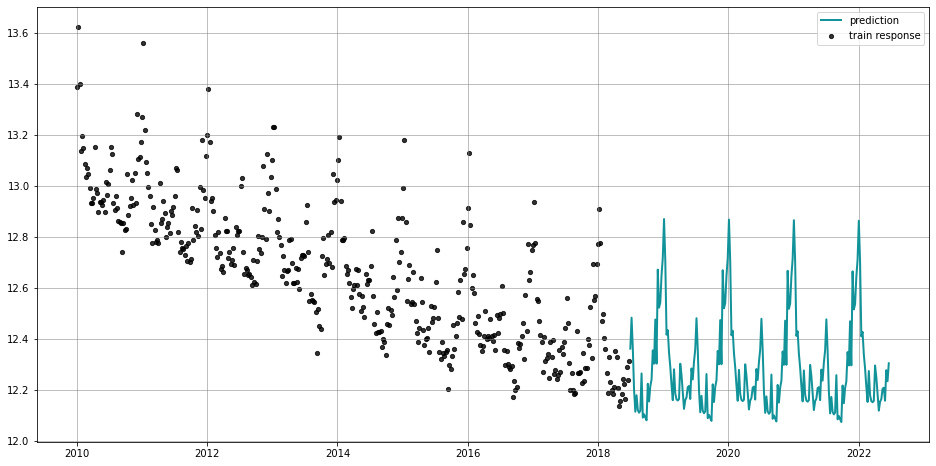

In [12]:
_ = plot_predicted_data(training_actual_df=df, predicted_df=predicted_df_dlt_log, 
                    date_col=dlt_log.date_col, actual_col=dlt_log.response_col)

## Logistic Global Trend

In case of modeling logistic growth/decay, user can switch to `logistic` in the `global_trend_option`. 

In [13]:
dlt_logit = DLTMAP(
    response_col='claims',
    date_col='week',
    seasonality=52,
    seed=2020,
    global_trend_option='logistic',
)

In [14]:
dlt_logit.fit(df=df)

In [15]:
predicted_df_dlt_logit = dlt_logit.predict(df=future_df, decompose=True)

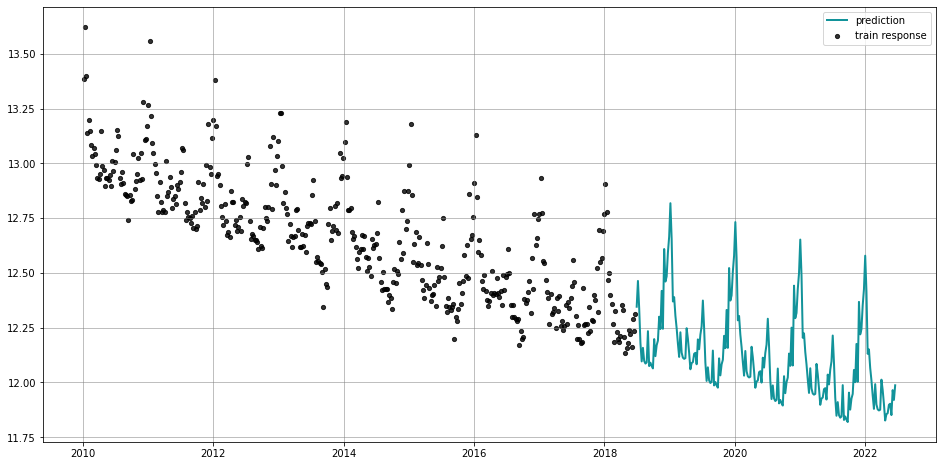

In [16]:
_ = plot_predicted_data(training_actual_df=df, predicted_df=predicted_df_dlt_logit, 
                    date_col=dlt_log.date_col, actual_col=dlt_log.response_col)

## Flat Global Trend

In [17]:
dlt_logit = DLTMAP(
    response_col='claims',
    date_col='week',
    seasonality=52,
    seed=2020,
    global_trend_option='flat',
)

In [18]:
dlt_logit.fit(df=df)

In [19]:
predicted_df_dlt_logit = dlt_logit.predict(df=future_df, decompose=True)

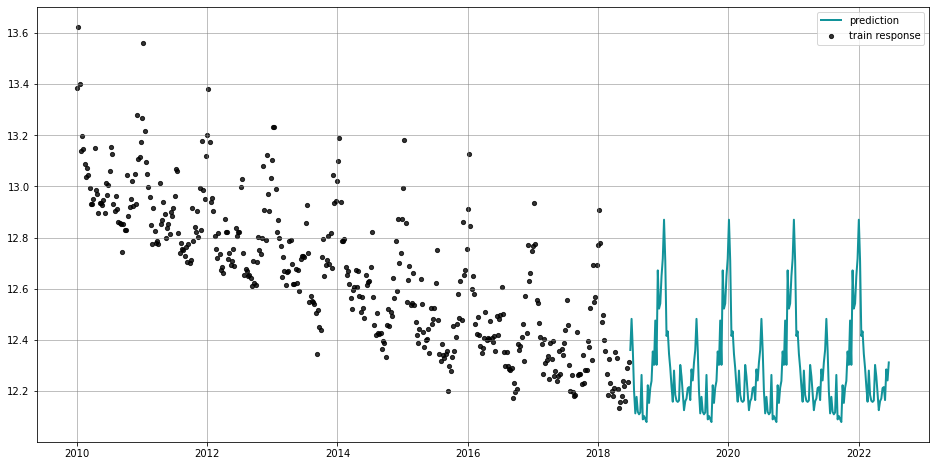

In [20]:
_ = plot_predicted_data(training_actual_df=df, predicted_df=predicted_df_dlt_logit, 
                    date_col=dlt_log.date_col, actual_col=dlt_log.response_col)